# Logistic Regression


Use the given data (X_logistic.txt and y_logistic.txt) for this exercise. Perform random shuffle and train-validation-test split(80:10:10). The y value to which class 0 belongs to can be taken as 0 and the y value to which class 1 belongs to can be taken as 1.

Split the dataset here below

In [24]:
from numpy import loadtxt
import numpy as np
from sklearn.model_selection import train_test_split
X = loadtxt("X_logistic.txt", comments="#", delimiter=" ", unpack=False)
y = loadtxt("y_logistic.txt", comments="#", delimiter=" ", unpack=False)

X_dash, X_test, y_dash, y_test = train_test_split(X, y, test_size=0.10, random_state=10)
X_train, X_valid, y_train, y_valid = train_test_split(X_dash, y_dash, test_size=0.10, random_state=10)
y_test = y_test.reshape(-1,1)
print(np.shape(X_test))
print(np.shape(y_test.reshape(-1,1)))

(10, 2)
(10, 1)


(a) Logistic Regression uses the sigmoid function for binary classification. 

<br> (i) Plot the sigmoid function for the range x : [-20,20]. This exercise will help you understand the shape of the sigmoid function and show its suitability in binary classification problems.



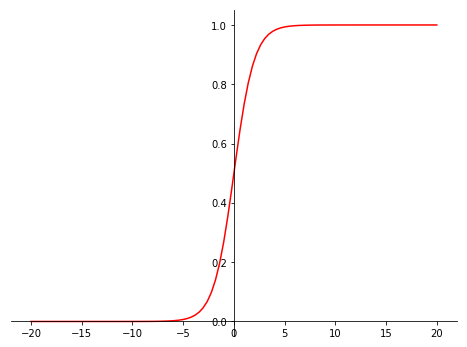

In [97]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-20,20,100)

y = (1/(1+np.exp(-x)))

# setting the axes at the centre
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()


(ii) Comment on the nature of the sigmoid function graph (specifically : domain,range,behaviour in extreme inputs). This task will give you further insight on the sigmoid function, which will help you while implementing logistic regression.

Domain: [-inf,+inf]
<br>Range: [0,1]
<br>Beyond [-5,5] the sigmoid function tends to flatten.

Write your answer here.

(d) Derive and plot the gradients of the sigmoid function for the same range. This is needed for gradient descent in logistic regression.

Write the gradient formula here

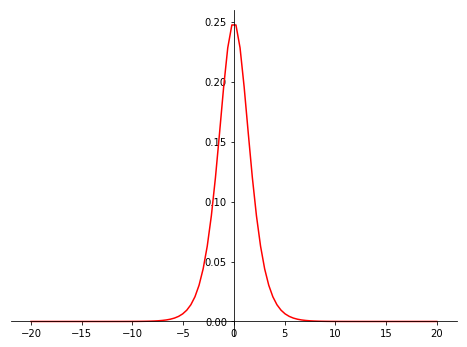

In [99]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(-20,20,100)

y = (1/(1+np.exp(-x)))*(1- (1/(1+np.exp(-x))))

# setting the axes at the centre
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()


(d) Implement logistic regression (using only numpy) to predict whether the test datapoints belong to class 0 or 1. Gradient descent also has to be implemented using numpy. 
<br>(i)Choose the best learning rate parameter between 0.001, 0.01, 0.1 and the number of iterations between 20,50 and 100 by using validation dataset(for which loss is minimized). 



In [112]:
from sklearn.metrics import f1_score
def g(z):
    return 1 / (1 + np.exp(-z))

def h(X, theta):    
    return g(X @ theta)

def J(preds, y):
    return 1/m * (-y @ np.log(preds) - (1 - y) @ np.log(1 - preds))

def compute_gradient(theta, X, y):
    preds = h(X, theta)
    gradient = 1/m * X.T @ (preds - y)
    return gradient




iterations = [50,100,1000]
learning_rate = [0.001,0.01,0.1]


def test_pred_logistic_regression(X_test,y_test,iterations,learning_rate,thetaBest):
   
    pred = h(X_test, thetaBest)

    y_pred = np.zeros((len(y_test)))

    y_pred = np.zeros((len(y_test)))
    for j in range(len(y_test)):
        if (pred[j] > 0.5):
            y_pred[j] = 1

    acc = accuracy_score(y_test, y_pred)   

    
    return acc


def validation_pred_logistic_regression(X_train, y_train, X_valid,y_valid,iterations,learning_rate):
    X = X_train
    y = y_train
    m, n = X.shape
    K = 2
    theta = np.zeros(n)

    alpha = 0.1
    lossMin = 10000;
    bestalpha = 0
    bestiter = 0
    thetaBest = None
    for alpha in learning_rate:
        for it in iterations: 
            theta = np.zeros(n)
            for i in range(it):
                gradient = compute_gradient(theta, X, y)
                theta -= alpha * gradient

            preds = h(X_valid, theta)
            loss = J(preds, y_valid)


            if (loss < lossMin):
                lossMin = loss
                bestalpha = alpha
                bestiter = it
                thetaBest = theta

    return [lossMin,bestalpha, bestiter,thetaBest];
         

lossMin,bestalpha,bestiter,thetaBest = validation_pred_logistic_regression(X_train, y_train, X_train,y_train, iterations,learning_rate)


Report minimum loss, best learning rate and best total number of iterations used.

<br>(ii)Report the accuracy by running the algorithm on test data for the best weights obtained. 

In [114]:
test_pred_logistic_regression(X_test,y_test,iterations,learning_rate,thetaBest)

0.9

Report accuracy score here

(e) Plot the logistic regression classifier on a 2d plot (for test datapoints: color the positively classified area dark green, and negatively classified area light red). Add the training data points (for train datapoints: color the positively classified area light green, and negatively classified area light red) also on the plot. 

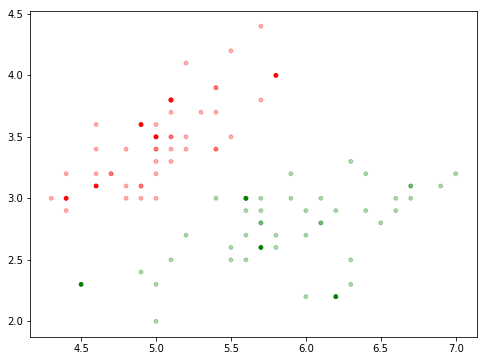

In [115]:
colors_train = ['red' if y == 0 else 'green' for y in y_train]
colors_test = ['red' if y == 0 else 'green' for y in y_pred]
fig = plt.figure(figsize=(8, 6))
plt.scatter(X_train[:,0], X_train[:,1], color = colors_train, s=15, alpha = 0.3)
plt.scatter(X_test[:,0], X_test[:,1], color = colors_test, s=15)
# plt.set_title("Dataset1 : Classifier 1a")
plt.show()